# Analisis Dan Peramalan Terhadap Covid-19 di Indonesia

# Metode OSEMN
## COVID-19 data from John Hopkins University

### Mengimport Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import seaborn as sns
import cufflinks as cf
import plotly.express as px
%matplotlib inline
import ahlive as ah

#library Forecasting
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm
from pmdarima.arima import ADFTest

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import itertools
from math import sqrt

#####
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)
cf.go_offline()

import warnings
warnings.filterwarnings('ignore')

In [2]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'scroll': True,
        'width': '100%',
        'height': '100%',
})

{'scroll': True, 'width': '100%', 'height': '100%'}

# Dataset Kasus Terkonfirmasi Covid-19

## Memproses Dataset dari Ekstensi CSV

In [3]:
confirm_cases=pd.read_csv("./Datasets/Juli2022/CONVENIENT_global_confirmed_cases.csv").drop([0]).rename(columns={'Country/Region': 'Date'})
confirm_cases

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,7/27/22,186.0,1261.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,68.0,0.0,184.0,2676.0,0.0,0.0,0.0,0.0,31.0
918,7/28/22,121.0,1228.0,98.0,182.0,0.0,0.0,0.0,0.0,0.0,...,0.0,65.0,7.0,1072.0,1699.0,0.0,0.0,0.0,0.0,21.0
919,7/29/22,88.0,1084.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,58.0,-6.0,455.0,1805.0,0.0,0.0,0.0,0.0,40.0
920,7/30/22,71.0,1019.0,87.0,0.0,0.0,0.0,32.0,0.0,0.0,...,0.0,49.0,0.0,371.0,1670.0,0.0,0.0,28.0,0.0,0.0


## Melihat dataset per bagian

In [4]:
# confirm_cases.head()
# confirm_cases.tail()
confirm_cases.iloc[342:350]

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
343,12/30/20,183.0,581.0,323.0,64.0,62.0,0.0,0.0,11765.0,582.0,...,518.0,78.0,0.0,260.0,2.0,1277.0,0.0,1.0,285.0,300.0
344,12/31/20,0.0,589.0,299.0,66.0,120.0,0.0,1.0,11586.0,531.0,...,639.0,75.0,0.0,437.0,9.0,1268.0,0.0,2.0,263.0,242.0
345,1/1/21,183.0,0.0,287.0,68.0,15.0,0.0,0.0,4080.0,329.0,...,634.0,122.0,0.0,326.0,9.0,1219.0,0.0,2.0,272.0,217.0
346,1/2/21,73.0,675.0,262.0,49.0,40.0,0.0,0.0,5240.0,60.0,...,522.0,0.0,0.0,199.0,8.0,1064.0,0.0,0.0,233.0,407.0
347,1/3/21,123.0,447.0,249.0,26.0,34.0,0.0,1.0,5884.0,229.0,...,548.0,76.0,0.0,147.0,12.0,932.0,0.0,0.0,352.0,774.0
348,1/4/21,200.0,185.0,237.0,57.0,42.0,0.0,0.0,8222.0,193.0,...,603.0,0.0,0.0,177.0,3.0,1009.0,0.0,0.0,411.0,564.0
349,1/5/21,102.0,660.0,228.0,59.0,72.0,0.0,0.0,13790.0,324.0,...,678.0,37.0,0.0,255.0,7.0,941.0,0.0,0.0,652.0,1365.0
350,1/6/21,94.0,725.0,247.0,40.0,108.0,0.0,3.0,13441.0,309.0,...,944.0,55.0,0.0,246.0,1.0,1088.0,0.0,1.0,850.0,610.0


## Informasi Tentang Dataset Terkonfirmasi

In [5]:
# confirm_cases.info()
# confirm_cases.describe()
confirm_cases.isnull().sum()

Date                    0
Afghanistan             0
Albania                 0
Algeria                 0
Andorra                 0
                       ..
West Bank and Gaza      0
Winter Olympics 2022    0
Yemen                   0
Zambia                  0
Zimbabwe                0
Length: 286, dtype: int64

# Kasus Terkonfirmasi di Negara Asia Tenggara

In [6]:
se_asia_confirm=confirm_cases[['Date', 'Brunei', 'Burma', 'Cambodia', 'Timor-Leste', 'Indonesia', 'Laos', 'Malaysia',
            'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'India']]
se_asia_confirm['Date']=pd.to_datetime(se_asia_confirm.Date)
se_asia_confirm

,Date,Brunei,Burma,Cambodia,Timor-Leste,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam,India
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
5,2020-01-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,2022-07-27,1328.0,11.0,0.0,0.0,6438.0,86.0,4503.0,2726.0,8763.0,1902.0,2676.0,20557.0
918,2022-07-28,1199.0,18.0,49.0,5.0,6353.0,89.0,3926.0,3858.0,8565.0,2480.0,1699.0,0.0
919,2022-07-29,1506.0,34.0,26.0,3.0,5831.0,83.0,4860.0,4128.0,7938.0,1962.0,1805.0,40817.0
920,2022-07-30,0.0,40.0,47.0,0.0,5398.0,57.0,4271.0,3994.0,6558.0,1664.0,1670.0,19673.0


## Total data Terkonfirmasi di Asia Tenggara

In [7]:
total_se_asia_confirm=pd.DataFrame(se_asia_confirm.sum(), columns=["Total Cases"])
total_se_asia_confirm

,Total Cases
Brunei,205890.0
Burma,614092.0
Cambodia,136789.0
Timor-Leste,22999.0
Indonesia,6207098.0
Laos,211239.0
Malaysia,4680053.0
Philippines,3776627.0
Singapore,1714056.0
Thailand,4592280.0


## 5 Terbesar Kasus Terkonfirmasi di Asia Tenggara

In [8]:
se_asia_confirm.sum().nlargest(5)

India        44036275.0
Vietnam      10779632.0
Indonesia     6207098.0
Malaysia      4680053.0
Thailand      4592280.0
dtype: float64

## 5 Terbesar Kasus Terkonfirmasi di Asia Tenggara Menggunakan Pie Chart

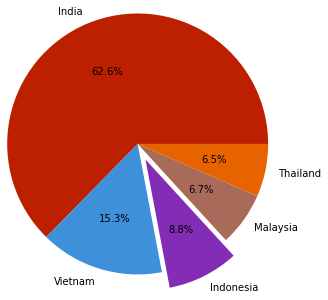

In [9]:
total_in=se_asia_confirm['India'].sum()
total_vn=se_asia_confirm['Vietnam'].sum()
total_id=se_asia_confirm['Indonesia'].sum()
total_my=se_asia_confirm['Malaysia'].sum()
total_th=se_asia_confirm['Thailand'].sum()

exp_vals = [total_in, total_vn, total_id, total_my, total_th]
exp_labels = ["India", "Vietnam", "Indonesia", "Malaysia", "Thailand"]

plt.pie(exp_vals, labels=exp_labels, radius=1.5, autopct='%0.1f%%', explode=[0,0,0.2,0,0])
plt.show()

## 5 Terbesar Kasus Terkonfirmasi di Asia Tenggara Menggunakan Bar Chart

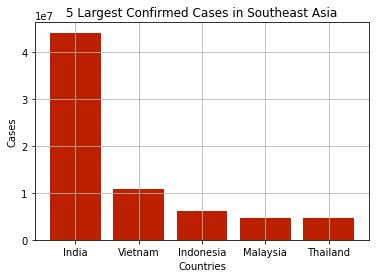

In [10]:
plt.bar(exp_labels, exp_vals)
plt.grid()

plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('5 Largest Confirmed Cases in Southeast Asia')

plt.show()

# Memilih Negara Dekat Indonesia

In [11]:
asia_confirm=confirm_cases[['Date', 'Indonesia', 'Malaysia', 'Singapore']]
asia_confirm['Date']=pd.to_datetime(asia_confirm.Date)
asia_confirm

,Date,Indonesia,Malaysia,Singapore
1,2020-01-23,0.0,0.0,1.0
2,2020-01-24,0.0,0.0,2.0
3,2020-01-25,0.0,4.0,0.0
4,2020-01-26,0.0,0.0,1.0
5,2020-01-27,0.0,0.0,1.0
...,...,...,...,...
917,2022-07-27,6438.0,4503.0,8763.0
918,2022-07-28,6353.0,3926.0,8565.0
919,2022-07-29,5831.0,4860.0,7938.0
920,2022-07-30,5398.0,4271.0,6558.0


# Kasus Terkonfirmasi Negara Dekat Indonesia Menggunakan Bar Chart

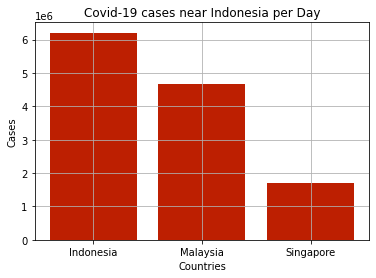

In [12]:
total_id=asia_confirm['Indonesia'].sum()
total_my=asia_confirm['Malaysia'].sum()
total_sg=asia_confirm['Singapore'].sum()

exp_vals = [total_id, total_my, total_sg]
exp_labels = ["Indonesia", "Malaysia", "Singapore"]

plt.bar(exp_labels, exp_vals)
plt.grid()

plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('Covid-19 cases near Indonesia per Day')

plt.show()

In [13]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=['Indonesia', 'Malaysia', 'Singapore'],
        y=[
            asia_confirm['Indonesia'].sum(),
            asia_confirm['Malaysia'].sum(),
            asia_confirm['Singapore'].sum()
        ],
    ))

fig.update_layout(
    title_text="Confirmed Cases in Indonesia, Malaysia, Singapore",
    yaxis=dict(title='Cases',
               titlefont_size=14,
               tickfont_size=14),
    xaxis=dict(title='Country',
               titlefont_size=14,
               tickfont_size=14))

fig.update_yaxes(automargin=True)

fig.show()

# Kasus Terkonfirmasi Dekat Negara Indonesia Menggunakan Line Chart

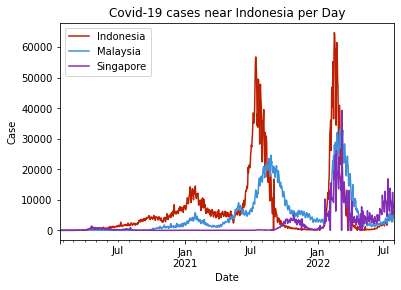

In [14]:
asia_confirm.plot(kind='line', x='Date', y=['Indonesia', 'Malaysia', 'Singapore'])

plt.title('Covid-19 cases near Indonesia per Day')
plt.ylabel('Case')
plt.show()

In [15]:
px.line(asia_confirm, 
        x='Date', 
        y=['Indonesia', 'Malaysia', 'Singapore'], 
        labels={'x': "Date", 'y':'Indonesia'}, 
        title='Confirmed Cases in Indonesia, Singapore, Malaysia')

# Kasus Terkonfirmasi Negara Dekat Indonesia Tertinggi

In [16]:
total_max_value=pd.DataFrame(asia_confirm.max().drop(['Date']), columns=['Max Value'])
total_max_value

,Max Value
Indonesia,64718.0
Malaysia,33406.0
Singapore,39252.0


# Kasus Terkonfirmasi Covid-19 di Indonesia Setiap Bulan

In [17]:
unique_year = pd.DatetimeIndex(asia_confirm['Date']).year.unique()
unique_month = pd.DatetimeIndex(asia_confirm['Date']).month.unique()
list_sum = []
region = 'Indonesia'

d = pd.DatetimeIndex(asia_confirm['Date'])
for y in unique_year :
    for m in unique_month :
        tmp = asia_confirm[(d.month == m) & (d.year == y)]
        print_date = str(y) + '/' + str(m)
        list_sum.append([print_date, tmp[region].sum()])

list_day = [i[0] for i in list_sum]
list_sum = [i[1] for i in list_sum]
preview = pd.DataFrame(list_day, columns=['Date'])
preview['Total Confirmed Cases per Month'] = list_sum

print('Region : ' + region)
preview

Region : Indonesia


,Date,Total Confirmed Cases per Month
0,2020/1,0.0
1,2020/2,0.0
2,2020/3,1528.0
3,2020/4,8590.0
4,2020/5,16355.0
5,2020/6,29912.0
6,2020/7,51991.0
7,2020/8,66420.0
8,2020/9,112212.0
9,2020/10,123080.0


# Visualisasi Data Kasus Terkonfirmasi di Indonesia Menggunakan Ahlive

## Memanggil Dataset Kasus Terkonfirmasi Terlebih Dahulu

In [18]:
cc_tidy = confirm_cases.melt(
    id_vars=['Date'],
    var_name='Country', value_name='Cases')
display(cc_tidy)

,Date,Country,Cases
0,1/23/20,Afghanistan,0.0
1,1/24/20,Afghanistan,0.0
2,1/25/20,Afghanistan,0.0
3,1/26/20,Afghanistan,0.0
4,1/27/20,Afghanistan,0.0
...,...,...,...
262480,7/27/22,Zimbabwe,31.0
262481,7/28/22,Zimbabwe,21.0
262482,7/29/22,Zimbabwe,40.0
262483,7/30/22,Zimbabwe,0.0


In [19]:
country = ['Indonesia']
cc_subset = cc_tidy.loc[cc_tidy['Country'].isin(country)]
display(cc_subset)

,Date,Country,Cases
137229,1/23/20,Indonesia,0.0
137230,1/24/20,Indonesia,0.0
137231,1/25/20,Indonesia,0.0
137232,1/26/20,Indonesia,0.0
137233,1/27/20,Indonesia,0.0
...,...,...,...
138145,7/27/22,Indonesia,6438.0
138146,7/28/22,Indonesia,6353.0
138147,7/29/22,Indonesia,5831.0
138148,7/30/22,Indonesia,5398.0


In [20]:
cc_country = cc_subset.groupby(['Date', 'Country'])[['Cases']].sum().reset_index()
cc_country = cc_country.loc[cc_country['Date'] >= '1/01/20']
display(cc_country)

,Date,Country,Cases
0,1/1/21,Indonesia,8072.0
1,1/1/22,Indonesia,274.0
2,1/10/21,Indonesia,9640.0
3,1/10/22,Indonesia,454.0
4,1/11/21,Indonesia,8692.0
...,...,...,...
916,9/7/21,Indonesia,7201.0
917,9/8/20,Indonesia,3046.0
918,9/8/21,Indonesia,6731.0
919,9/9/20,Indonesia,3307.0


In [21]:
ah_cc = ah.DataFrame(cc_country, 'Date', 'Cases', label='Country')
ah_cc

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 1, state: 921)
Data variables:
    x        (item, state) object '1/1/21' '1/1/22' ... '9/9/20' '9/9/21'
    y        (item, state) float64 8.072e+03 274.0 ... 3.307e+03 5.99e+03
    chart    (item) <U4 'line'
    label    (item, state) <U9 'Indonesia' 'Indonesia' ... 'Indonesia'
    group    (item) <U1 ''
Attributes (2/49):
    xlabel_kwds  {'xlabel': 'Date'}
    ylabel_kwds  {'ylabel': 'Cases'}


  0%|          | 0/11 [00:00<?, ? frames/s]


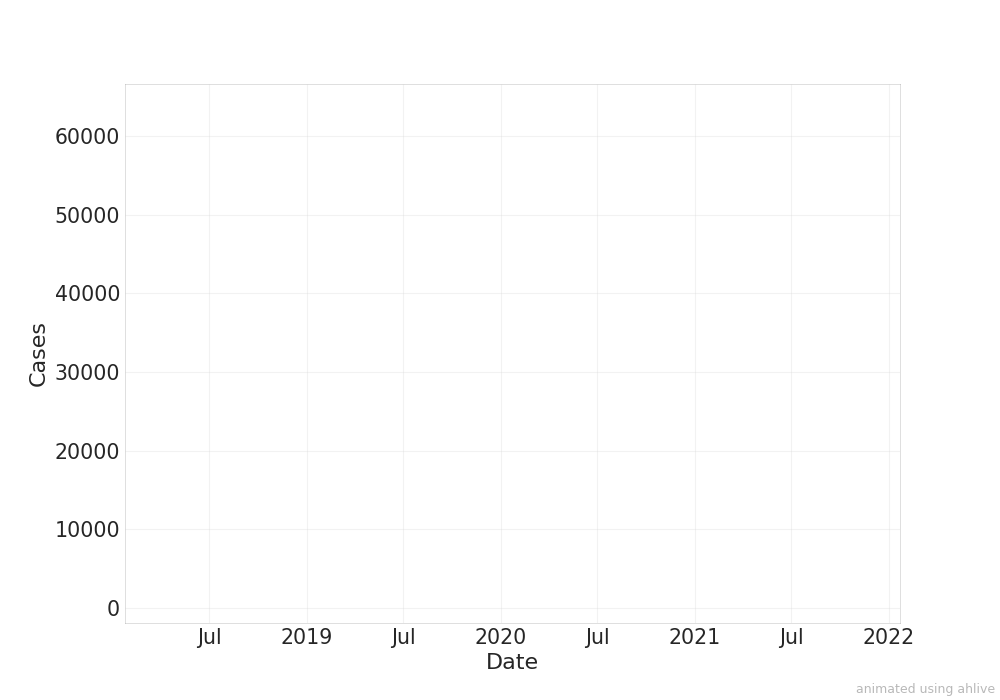

In [22]:
cc_dts = cc_country.copy()
cc_dts['Date'] = pd.to_datetime(cc_dts['Date'])
cc_dts = cc_dts.loc[cc_dts['Date'] >= '1/01/20']
cc_dts = cc_dts.groupby([
    pd.Grouper(key='Date', freq='7D'), 'Country'
])['Cases'].last().reset_index()
cc_scale = cc_dts.sort_values('Date')
cc_scale['Cases'] /= 1

ah_cc = ah.DataFrame(
    cc_scale, 'Date', 'Cases', label='Country',
    figsize=(10, 7), animate='test'
).config('legend', sortby='y')
ah_cc.render()

  0%|          | 0/11 [00:00<?, ? frames/s]


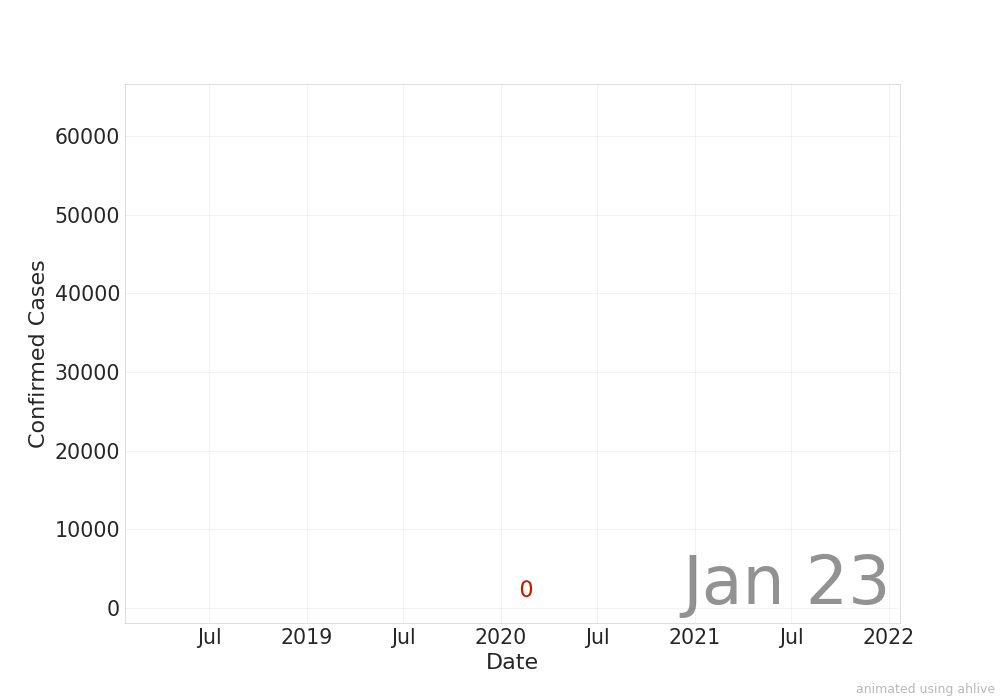

In [23]:
ah_cc = ah.DataFrame(
    cc_scale, 'Date', 'Cases', label='Country',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases',
    animate='test'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_cc.render()

# Dataset Kasus Kematian Covid-19

# Memproses dataset dari Ekstensi CSV

In [24]:
death_cases=pd.read_csv("./Datasets/Juli2022/CONVENIENT_global_deaths.csv").drop([0]).rename(columns={'Country/Region': 'Date'})
death_cases

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,7/27/22,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
918,7/28/22,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
919,7/29/22,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
920,7/30/22,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0


# Informasi Tentang Dataset Kematian 

In [25]:
death_cases.info()
death_cases.describe()
death_cases.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 1 to 921
Columns: 286 entries, Date to Zimbabwe
dtypes: float64(196), object(90)
memory usage: 2.0+ MB


Date                    0
Afghanistan             0
Albania                 0
Algeria                 0
Andorra                 0
                       ..
West Bank and Gaza      0
Winter Olympics 2022    0
Yemen                   0
Zambia                  0
Zimbabwe                0
Length: 286, dtype: int64

# Kasus Kematian di Asia Tenggara

In [26]:
se_asia_death=death_cases[['Date', 'Brunei', 'Burma', 'Cambodia', 'Timor-Leste', 'Indonesia', 'Laos', 'Malaysia',
            'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'India']]
se_asia_death['Date']=pd.to_datetime(se_asia_death.Date)
se_asia_death

,Date,Brunei,Burma,Cambodia,Timor-Leste,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam,India
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,2022-07-27,0.0,0.0,0.0,0.0,11.0,0.0,10.0,0.0,3.0,32.0,0.0,45.0
918,2022-07-28,0.0,0.0,0.0,0.0,17.0,0.0,4.0,10.0,2.0,37.0,0.0,-1.0
919,2022-07-29,0.0,0.0,0.0,0.0,13.0,0.0,10.0,14.0,2.0,32.0,1.0,101.0
920,2022-07-30,0.0,0.0,0.0,0.0,13.0,0.0,4.0,1.0,3.0,26.0,0.0,45.0


# Total Kematian di Asia Tenggara

In [27]:
total_death_se_asia=pd.DataFrame(se_asia_death.sum(), columns=['Total Death Cases'])
total_death_se_asia

,Total Death Cases
Brunei,225.0
Burma,19434.0
Cambodia,3056.0
Timor-Leste,133.0
Indonesia,156993.0
Laos,757.0
Malaysia,35969.0
Philippines,60727.0
Singapore,1500.0
Thailand,31404.0


# 5 Terbesar di Asia Tenggara

In [28]:
se_asia_death.sum().nlargest(5)

India          526396.0
Indonesia      156993.0
Philippines     60727.0
Vietnam         43093.0
Malaysia        35969.0
dtype: float64

# 5 Terbesar Kasus Kematian di Asia Tenggara Menggunakan Pie Chart

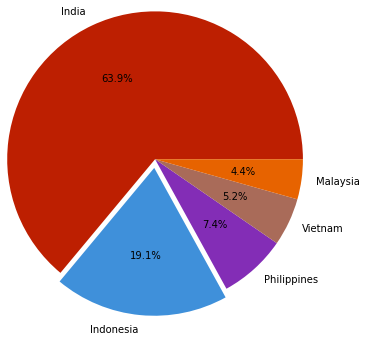

In [29]:
total_in=se_asia_death['India'].sum()
total_id=se_asia_death['Indonesia'].sum()
total_ph=se_asia_death['Philippines'].sum()
total_vn=se_asia_death['Vietnam'].sum()
total_my=se_asia_death['Malaysia'].sum()

exp_vals = [total_in, total_id, total_ph, total_vn, total_my]
exp_labels = ["India", "Indonesia", "Philippines", "Vietnam", "Malaysia"]

plt.pie(exp_vals, labels=exp_labels, radius=1.7, autopct='%0.1f%%', explode=[0,0.1,0,0,0])
plt.show()

# 5 Terbesar Kasus Kematian di Asia Tenggara Menggunakan Bar Chart

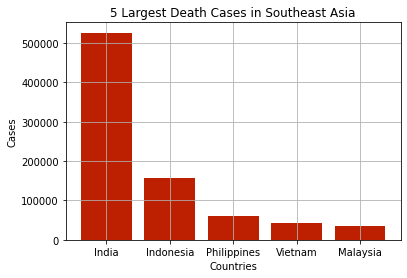

In [30]:
plt.bar(exp_labels, exp_vals)
plt.grid()

plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('5 Largest Death Cases in Southeast Asia')

plt.show()

# Kasus Kematian Dekat Negara Indonesia

In [31]:
asia_death=death_cases[['Date', 'Indonesia', 'Malaysia', 'Singapore']]
asia_death['Date']=pd.to_datetime(asia_death.Date)
asia_death

,Date,Indonesia,Malaysia,Singapore
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
5,2020-01-27,0.0,0.0,0.0
...,...,...,...,...
917,2022-07-27,11.0,10.0,3.0
918,2022-07-28,17.0,4.0,2.0
919,2022-07-29,13.0,10.0,2.0
920,2022-07-30,13.0,4.0,3.0


# Kasus Kematian Dekat Negara Indonesia Menggunakan Bar Chart

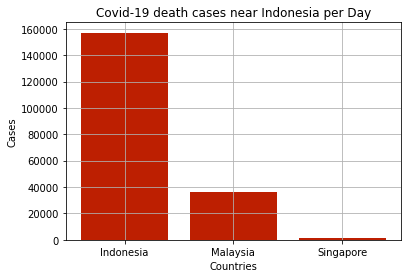

In [32]:
total_id=asia_death['Indonesia'].sum()
total_my=asia_death['Malaysia'].sum()
total_sg=asia_death['Singapore'].sum()

exp_vals = [total_id, total_my, total_sg]
exp_labels = ["Indonesia", "Malaysia", "Singapore"]

plt.bar(exp_labels, exp_vals)
plt.grid()

plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('Covid-19 death cases near Indonesia per Day')

plt.show()

In [33]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=['Indonesia', 'Malaysia', 'Singapore'],
        y=[
            asia_death['Indonesia'].sum(),
            asia_death['Malaysia'].sum(),
            asia_death['Singapore'].sum()
        ],
    ))

fig.update_layout(
    title_text="Death Cases in Indonesia, Malaysia, Singapore",
    yaxis=dict(title='Cases',
               titlefont_size=14,
               tickfont_size=14),
    xaxis=dict(title='Country',
               titlefont_size=14,
               tickfont_size=14))

fig.update_yaxes(automargin=True)

fig.show()

# Kasus Kematian Dekat Negara Indonesia Menggunakan Line Chart

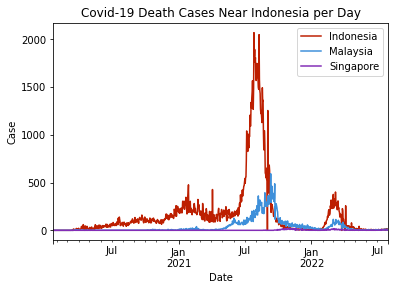

In [34]:
asia_death.plot(kind='line', x='Date', y=['Indonesia', 'Malaysia', 'Singapore'])

plt.title('Covid-19 Death Cases Near Indonesia per Day')
plt.ylabel('Case')
plt.show()

In [35]:
px.line(asia_death, 
        x='Date', 
        y=['Indonesia', 'Malaysia', 'Singapore'], 
        labels={'x': "Date", 'y':'Indonesia'}, 
        title='Death Cases in Indonesia, Singapore, Malaysia')

# Kasus Kematian Tertinggi di Negara Dekat indonesia

In [36]:
total_max_value=pd.DataFrame(asia_death.max().drop(['Date']), columns=['Max Value'])
total_max_value

,Max Value
Indonesia,2069.0
Malaysia,592.0
Singapore,22.0


# Kasus Kematian di Indonesia Setiap Bulan

In [37]:
unique_year = pd.DatetimeIndex(asia_death['Date']).year.unique()
unique_month = pd.DatetimeIndex(asia_death['Date']).month.unique()
list_sum = []
region = 'Indonesia'

d = pd.DatetimeIndex(asia_death['Date'])
for y in unique_year :
    for m in unique_month :
        tmp = asia_death[(d.month == m) & (d.year == y)]
        print_date = str(y) + '/' + str(m)
        list_sum.append([print_date, tmp[region].sum()])

list_day = [i[0] for i in list_sum]
list_sum = [i[1] for i in list_sum]
preview = pd.DataFrame(list_day, columns=['Date'])
preview['Total Death Cases per Month'] = list_sum

print('Region : ' + region)
preview

Region : Indonesia


,Date,Total Death Cases per Month
0,2020/1,0.0
1,2020/2,0.0
2,2020/3,136.0
3,2020/4,656.0
4,2020/5,821.0
5,2020/6,1263.0
6,2020/7,2255.0
7,2020/8,2286.0
8,2020/9,3323.0
9,2020/10,3129.0


# Visualisasi Data Kasus Kematian di Indonesia Menggunakan Ahlive

## Memanggil Dataset Kasus Terkonfirmasi Terlebih Dahulu

In [38]:
dc_tidy = death_cases.melt(
    id_vars=['Date'],
    var_name='Country', value_name='Cases')
display(dc_tidy)

,Date,Country,Cases
0,1/23/20,Afghanistan,0.0
1,1/24/20,Afghanistan,0.0
2,1/25/20,Afghanistan,0.0
3,1/26/20,Afghanistan,0.0
4,1/27/20,Afghanistan,0.0
...,...,...,...
262480,7/27/22,Zimbabwe,0.0
262481,7/28/22,Zimbabwe,2.0
262482,7/29/22,Zimbabwe,1.0
262483,7/30/22,Zimbabwe,0.0


In [39]:
country = ['Indonesia']
dc_subset = dc_tidy.loc[dc_tidy['Country'].isin(country)]
display(dc_subset)

,Date,Country,Cases
137229,1/23/20,Indonesia,0.0
137230,1/24/20,Indonesia,0.0
137231,1/25/20,Indonesia,0.0
137232,1/26/20,Indonesia,0.0
137233,1/27/20,Indonesia,0.0
...,...,...,...
138145,7/27/22,Indonesia,11.0
138146,7/28/22,Indonesia,17.0
138147,7/29/22,Indonesia,13.0
138148,7/30/22,Indonesia,13.0


In [40]:
dc_country = dc_subset.groupby(['Date', 'Country'])[['Cases']].sum().reset_index()
dc_country = dc_country.loc[dc_country['Date'] >= '5/01/21']
display(dc_country)

,Date,Country,Cases
523,5/1/20,Indonesia,8.0
524,5/1/21,Indonesia,131.0
525,5/1/22,Indonesia,16.0
526,5/10/20,Indonesia,14.0
527,5/10/21,Indonesia,206.0
...,...,...,...
916,9/7/21,Indonesia,683.0
917,9/8/20,Indonesia,100.0
918,9/8/21,Indonesia,626.0
919,9/9/20,Indonesia,106.0


In [41]:
ah_dc = ah.DataFrame(dc_country, 'Date', 'Cases', label='Country')
ah_dc

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 1, state: 398)
Data variables:
    x        (item, state) object '5/1/20' '5/1/21' ... '9/9/20' '9/9/21'
    y        (item, state) float64 8.0 131.0 16.0 14.0 ... 626.0 106.0 334.0
    chart    (item) <U4 'line'
    label    (item, state) <U9 'Indonesia' 'Indonesia' ... 'Indonesia'
    group    (item) <U1 ''
Attributes (2/49):
    xlabel_kwds  {'xlabel': 'Date'}
    ylabel_kwds  {'ylabel': 'Cases'}


  0%|          | 0/11 [00:00<?, ? frames/s]


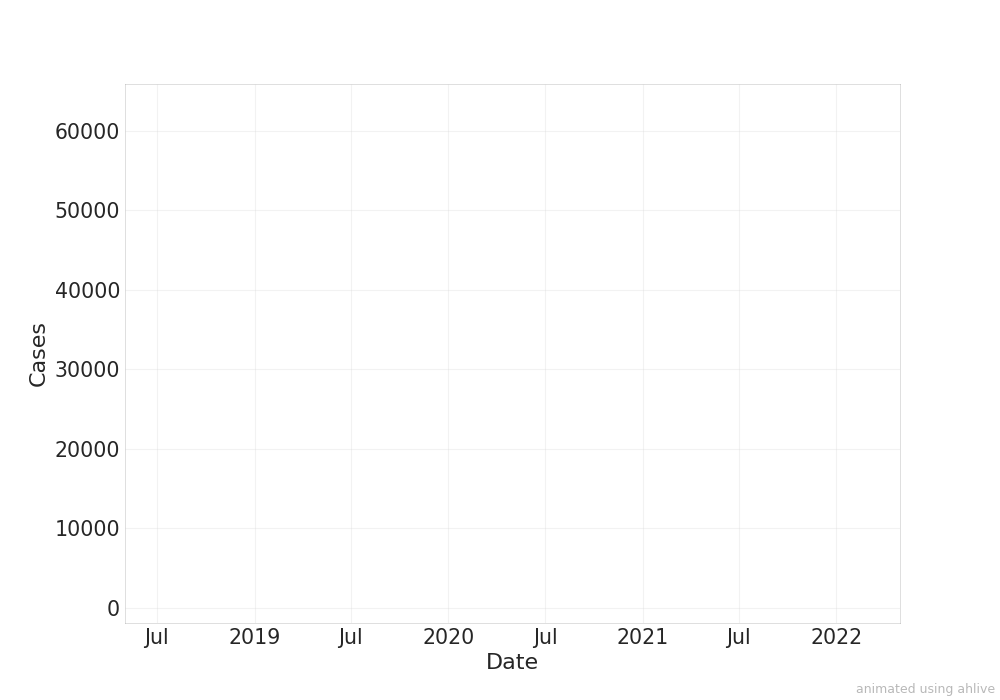

In [42]:
dc_dts = cc_country.copy()
dc_dts['Date'] = pd.to_datetime(dc_dts['Date'])
dc_dts = dc_dts.loc[dc_dts['Date'] >= '5/01/20']
dc_dts = dc_dts.groupby([
    pd.Grouper(key='Date', freq='7D'), 'Country'
])['Cases'].last().reset_index()
dc_scale = dc_dts.sort_values('Date')
dc_scale['Cases'] /= 1

ah_dc = ah.DataFrame(
    dc_scale, 'Date', 'Cases', label='Country',
    figsize=(10, 7), animate='test'
).config('legend', sortby='y')
ah_dc.render()

  0%|          | 0/11 [00:00<?, ? frames/s]


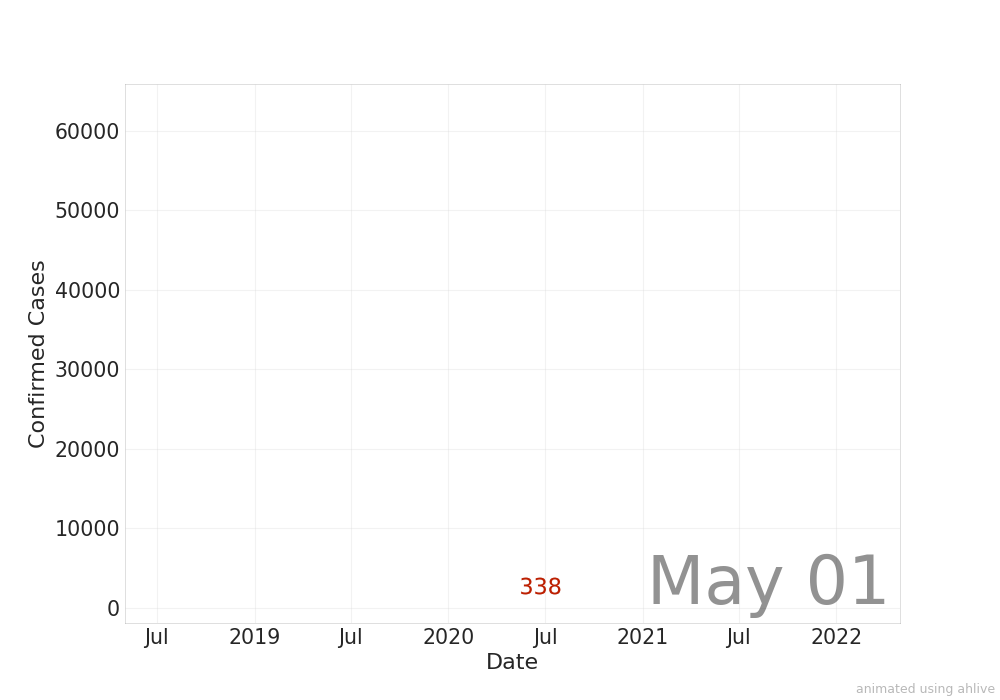

In [43]:
ah_dc = ah.DataFrame(
    dc_scale, 'Date', 'Cases', label='Country',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases',
    animate='test'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_dc.render()

# Peramalan / Forecasting

## Menggunakan Auto ARIMA dengan pmdarima

### Membuat Variabel Untuk Kasus Terkonfirmasi di Indonesia

In [44]:
id=confirm_cases['Indonesia']
id

1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
        ...  
917    6438.0
918    6353.0
919    5831.0
920    5398.0
921    4205.0
Name: Indonesia, Length: 921, dtype: float64

### Dalam Bentuk Grafik

<AxesSubplot:>

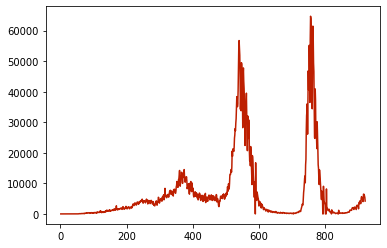

In [45]:
id.plot()

# ARIMA

## Augmented Dickey–Fuller test

In [46]:
adf_test=ADFTest(alpha=0.5)
adf_test.should_diff(id)

(0.01, False)

<AxesSubplot:>

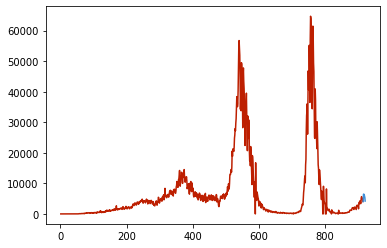

In [47]:
train, test=id[:914], id[914:]
n=len(id)
n_train=len(train)
n_test=len(test)

fig, ax=plt.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [48]:
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,
                           test="adf",
                           seasonal=False,
                           trace=True)
    return automodel

In [49]:
automodel = arimamodel(train)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=16943.564, Time=1.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19920.397, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=17005.436, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=18863.889, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=16943.010, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=18275.507, Time=0.50 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=16997.878, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=16944.250, Time=0.31 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=17935.492, Time=1.75 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=16998.988, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=16859.016, Time=0.85 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=16871.856, Time=1.70 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=16858.010, Time=0.82 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=16945.723, Time=0.36 sec
 ARIMA(3,0,4)(0,0,0

# Peramalan 7 Hari Ke Depan

In [50]:
pred_arima=automodel.predict(n_periods=7)
pred_arima

array([4035.04093973, 4897.01765316, 5365.0111914 , 4967.62725291,
       4783.86213915, 4872.43385638, 4589.79858732])

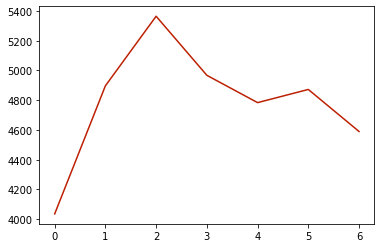

In [51]:
plt.plot(pred_arima)

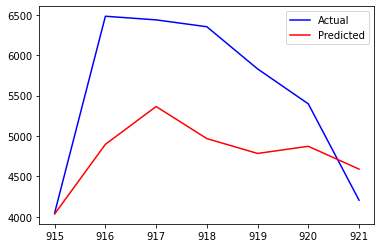

In [52]:
plt.plot(test.index, test, label="Actual", color='blue')
plt.plot(test.index, pred_arima, label="Predicted", color='red')
plt.legend()

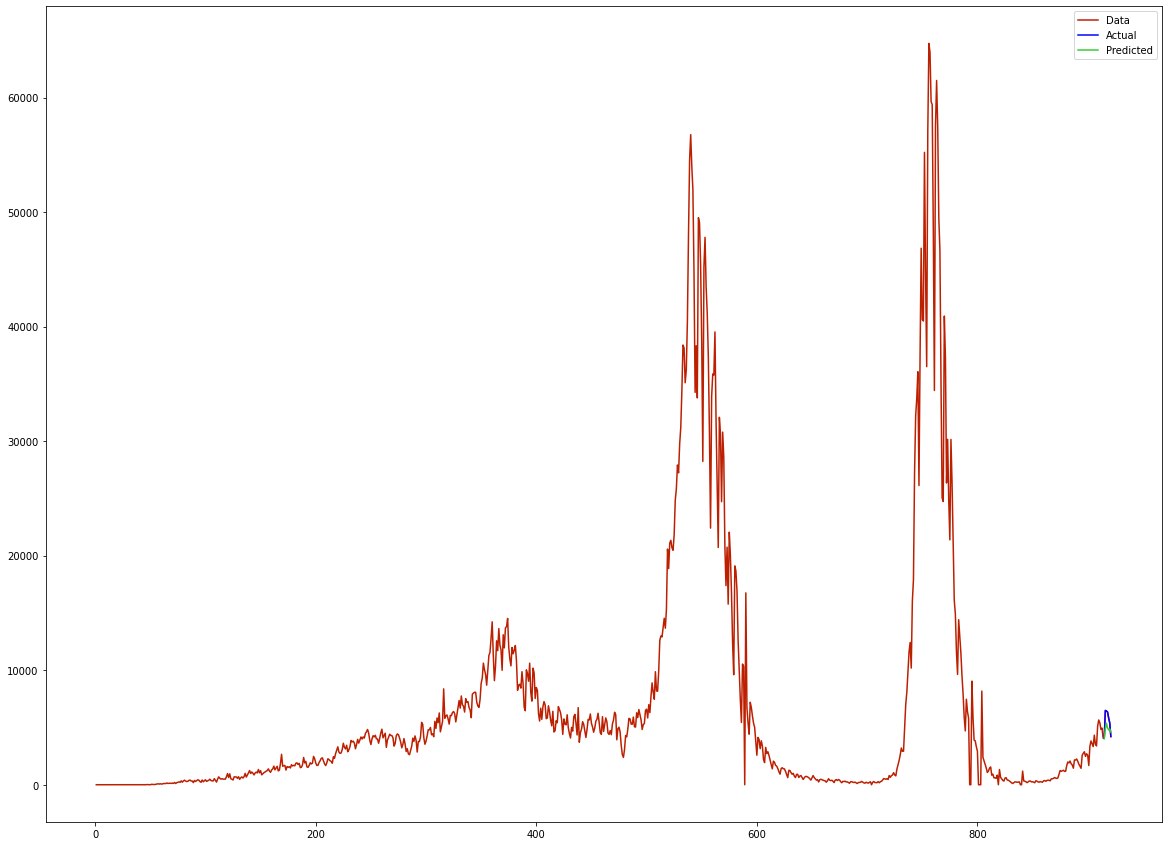

In [53]:
plt.figure(figsize=(20,15))
plt.plot(id, label="Data")
plt.plot(test.index, test, label="Actual", color='blue')
plt.plot(test.index, pred_arima, label="Predicted", color='limegreen')
plt.legend()

# Evaluasi

In [54]:
rmse_autoarima=sqrt(mean_squared_error(test, pred_arima))
print('Hasil RMSE: ', rmse_autoarima)
mae_autoarima = mean_absolute_error(test, pred_arima)
print('Hasil MAE : ', mae_autoarima)

Hasil RMSE:  1007.6038051616237
Hasil MAE :  859.2579363697025


# Peramalan Menggunakan ARIMA Dengan Statsmodels

In [55]:
arima = ARIMA(train, order=(5, 0, 5)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Indonesia   No. Observations:                  914
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -8360.121
Date:                Fri, 05 Aug 2022   AIC                          16744.242
Time:                        12:29:26   BIC                          16802.056
Sample:                             0   HQIC                         16766.311
                                - 914                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6748.7330   3.38e+04      0.200      0.842   -5.94e+04    7.29e+04
ar.L1          1.8112      0.020     89.320      0.000       1.771       1.851
ar.L2         -2.2396      0.033    -67.325      0.000      -2.305      -2.174
ar.L3          2.1608      0.037     58.078      0.000       2.088       2.234
ar.L4         -1.6007      0.030    -52.941      0.000      -1.660      -1.541
ar.L5          0.8625      0.015     55.729      0.000       0.832       0.893
ma.L1         -1.0170      0.026    -39.064      0.000      -1.068      -0.966
ma.L2          1.4567      0.039     37.497      0.000       1.381       1.533
ma.L3         -0.8689      0.042    -20.504      0.000      -0.952      -0.786
ma.L4          0.6980      0.034     20.281      0.000       0.631       0.765
ma.L5         -0.0794      0.022     -3.653      0.000      -0.122      -0.037
sigma2      6.007e+06   2619.129   2293.364      0.000       6e+06    6.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11296.16
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):             121.58   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.18e+17. Standard errors may be unstable.
"""

# Peramalan 7 Hari Ke Depan Dengan ARIMA

In [56]:
predict_arima = arima.predict(len(id), len(id)+6, typ='levels')
predict_arima

922    4240.646317
923    4865.748642
924    5245.983059
925    4880.967903
926    4575.603280
927    4599.350567
928    4468.049430
Name: predicted_mean, dtype: float64

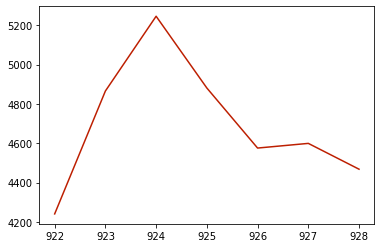

In [57]:
plt.plot(predict_arima)

## Perbandingan Data Aktual, Auto Arima dan ARIMA

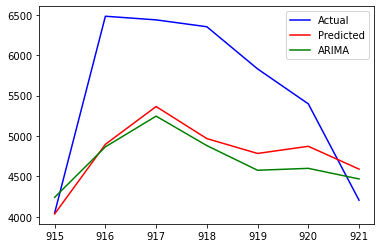

In [62]:
plt.plot(test.index, test, label="Actual", color='blue')
plt.plot(test.index, pred_arima, label="Predicted", color='red')
plt.plot(test.index, predict_arima, label="ARIMA", color='green')
plt.legend()

# Evaluasi

In [59]:
rmse_arima=sqrt(mean_squared_error(test, predict_arima))
print('Hasil RMSE: ',rmse_arima)
mae_arima = mean_absolute_error(test, predict_arima)
print('Hasil MAE : ', mae_arima)

Hasil RMSE:  1103.465598211087
Hasil MAE :  970.1488994699687


# Perbandingan

In [60]:
data = {'Methods':['Auto-ARIMA', 'ARIMA'],
        'RMSE':[rmse_autoarima, rmse_arima],
       'MAE': [mae_autoarima, mae_arima]}

compare = pd.DataFrame(data)
compare

,Methods,RMSE,MAE
0,Auto-ARIMA,1007.603805,859.257936
1,ARIMA,1103.465598,970.148899
